In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
# open file and read data
f = open("flamegraph.json")
data = json.load(f)[0]
synth = data['spans'][0]

In [3]:
# create dict to store time stats
funcs = ['find_parentheses', 'is_inside_or',
         'match_all', 'match_none', 'extend']
stats = {k: 0 for k in funcs}
stats['synth'] = synth['delta']

In [4]:
# a summation of time of all functions called
def recursive_add_time(function):
    # dict_keys(['name', 'start_ns', 'end_ns', 'delta', 'depth', 'children', 'notes'])
    if function['children']:
        for subfunctions in function['children']:
            func_name = subfunctions['name']
            func_time = subfunctions['delta']
            stats[func_name] += func_time
            recursive_add_time(subfunctions)


recursive_add_time(synth)
print(stats)

{'find_parentheses': 14886593, 'is_inside_or': 21796380, 'match_all': 7192999, 'match_none': 554791, 'extend': 38022206, 'synth': 47318500}


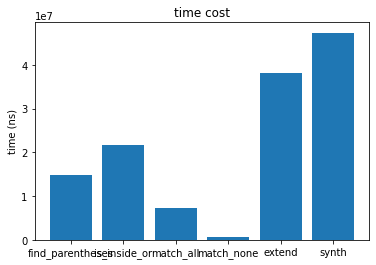

In [5]:
# draw plot
fig, ax = plt.subplots()
ax.bar(stats.keys(), stats.values())
ax.set_ylabel('time (ns)')
ax.set_title('time cost')

plt.show()

In [6]:
ratio_of_each = {k:round(v/stats['synth'], 2) for (k,v) in stats.items()}
"""
extend + matchall + matchnone = 0.97 synth
"""
ratio_of_each

{'find_parentheses': 0.31,
 'is_inside_or': 0.46,
 'match_all': 0.15,
 'match_none': 0.01,
 'extend': 0.8,
 'synth': 1.0}

In [7]:
print("find_parentheses/is_inside_or = ", round(stats['find_parentheses']/stats['is_inside_or'], 2))
print("is_inside_or/extend = ", round(stats['is_inside_or']/stats['extend'], 2))


find_parentheses/is_inside_or =  0.68
is_inside_or/extend =  0.57
